In [1]:
# Exploratory Data Analysis - NYC Citi Bike

import pandas as pd
import plotly.express as px
import plotly.io as pio

# Set default Plotly theme
pio.templates.default = "plotly_white"


In [3]:
# Load dataset
df = pd.read_csv('C:/Users/Ali/Desktop/JC-202307-citibike-tripdata.csv')


In [4]:
df

ride_id  rideable_type           started_at  \
0       7A68381621C25F78   classic_bike  2023-07-17 17:16:34   
1       0F814CA67B2FA120   classic_bike  2023-07-26 19:40:15   
2       775A38967EBF5FB4  electric_bike  2023-07-01 12:12:22   
3       D93B742DCE1C1447   classic_bike  2023-07-20 19:10:18   
4       AA7A6863B4B92169  electric_bike  2023-07-07 19:33:59   
...                  ...            ...                  ...   
106603  944F5CD711E7688E   classic_bike  2023-07-25 18:21:52   
106604  4665B542F79F8C43  electric_bike  2023-07-26 22:22:20   
106605  789D45FDEBC19E83   classic_bike  2023-07-31 07:57:29   
106606  FFBE463288D36C2A   classic_bike  2023-07-07 17:52:09   
106607  4DACECF4EBBEB60C   classic_bike  2023-07-26 20:54:16   

                   ended_at     start_station_name start_station_id  \
0       2023-07-17 17:20:52            Astor Place            JC077   
1       2023-07-26 19:44:37        Adams St & 2 St            HB407   
2       2023-07-01 12:27:45        McGinley Square            JC055   
3       2023-07-20 19:17:22  Baldwin at Montgomery            JC020   
4       2023-07-07 19:58:17  Baldwin at Montgomery            JC020   
...                     ...                    ...              ...   
106603  2023-07-25 18:34:38         Van Vorst Park            JC035   
106604  2023-07-26 22:26:20         Van Vorst Park            JC035   
106605  2023-07-31 08:03:58         Van Vorst Park            JC035   
106606  2023-07-07 18:00:14         Van Vorst Park            JC035   
106607  2023-07-26 21:05:33         Van Vorst Park            JC035   

                              end_station_name end_station_id  start_lat  \
0                      Communipaw & Berry Lane          JC084  40.719225   
1                9 St HBLR - Jackson St & 8 St          HB305  40.739727   
2                               Riverview Park          JC057  40.725340   
3                                 Brunswick St          JC023  40.723455   
4       Mama Johnson Field - 4 St & Jackson St          HB404  40.723659   
...                                        ...            ...        ...   
106603                            Newport Pkwy          JC008  40.718489   
106604                               Warren St          JC006  40.718489   
106605                            Newport Pkwy          JC008  40.718422   
106606                               Warren St          JC006  40.718489   
106607                            Newport Pkwy          JC008  40.718489   

        start_lng    end_lat    end_lng member_casual  
0      -74.071281  40.714358 -74.066611        member  
1      -74.036866  40.747907 -74.038412        member  
2      -74.067622  40.744319 -74.043991        member  
3      -74.064359  40.724176 -74.050656        member  
4      -74.064194  40.743140 -74.040041        casual  
...           ...        ...        ...           ...  
106603 -74.047727  40.728745 -74.032108        member  
106604 -74.047727  40.721124 -74.038051        member  
106605 -74.047691  40.728745 -74.032108        member  
106606 -74.047727  40.721124 -74.038051        member  
106607 -74.047727  40.728745 -74.032108        member  

[106608 rows x 13 columns]

In [22]:
# Preprocessing
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60
df = df[df['duration_min'] > 0]
df['hour'] = df['started_at'].dt.hour
df['day'] = df['started_at'].dt.day_name()
df['weekday'] = df['started_at'].dt.weekday  # for sorting
df['date'] = df['started_at'].dt.date

C:\Users\Ali\AppData\Local\Temp\ipykernel_22372\3592007861.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Ali\AppData\Local\Temp\ipykernel_22372\3592007861.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Ali\AppData\Local\Temp\ipykernel_22372\3592007861.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [23]:
# Order days of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day'] = pd.Categorical(df['day'], categories=day_order, ordered=True)


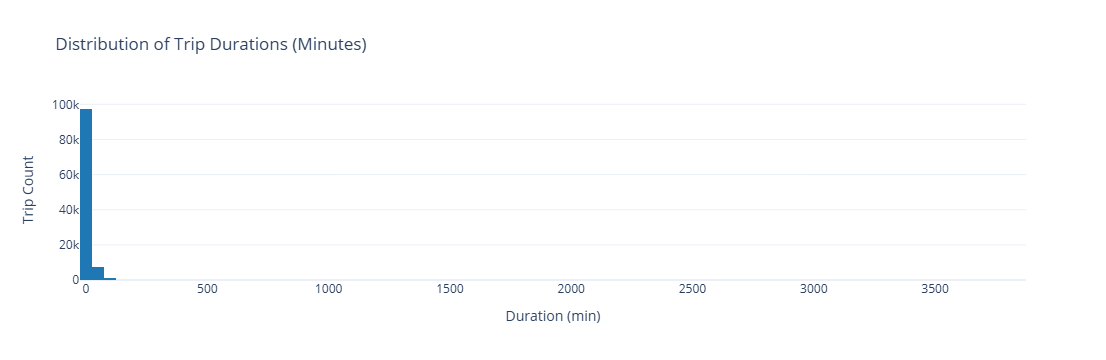

In [24]:
# Chart 1: Histogram of duration
fig1 = px.histogram(
    df, x='duration_min', nbins=100,
    title='Distribution of Trip Durations (Minutes)',
    color_discrete_sequence=['#1f77b4']
)
fig1.update_layout(xaxis_title='Duration (min)', yaxis_title='Trip Count')
fig1.show()


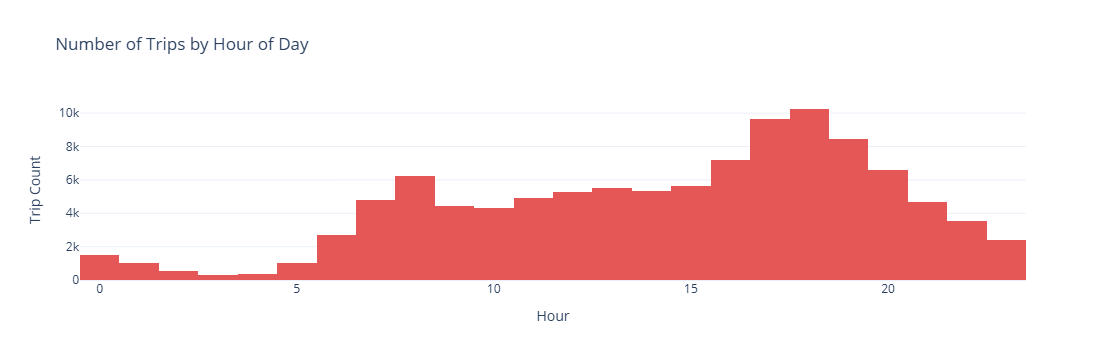

In [25]:
# Chart 2: Trips per hour
fig2 = px.histogram(
    df, x='hour',
    title='Number of Trips by Hour of Day',
    color_discrete_sequence=['#e45756']
)
fig2.update_layout(xaxis_title='Hour', yaxis_title='Trip Count')
fig2.show()


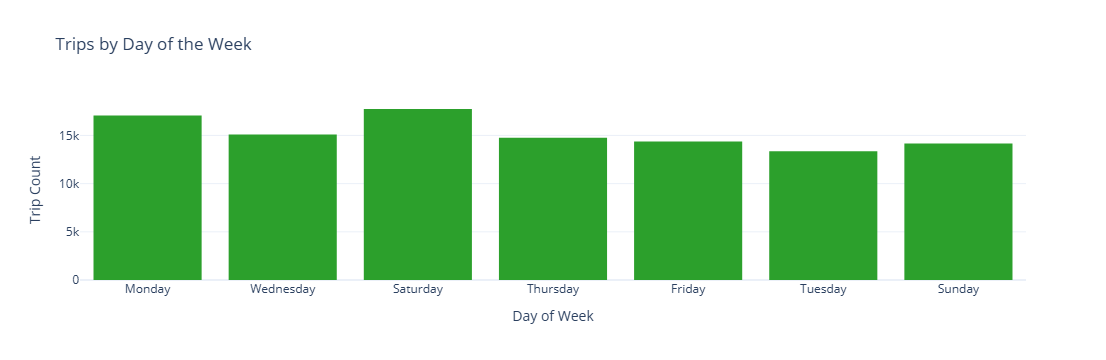

In [26]:
# Chart 3: Trips per day of week
fig3 = px.histogram(
    df, x='day',
    title='Trips by Day of the Week',
    color_discrete_sequence=['#2ca02c']
)
fig3.update_layout(xaxis_title='Day of Week', yaxis_title='Trip Count')
fig3.show()


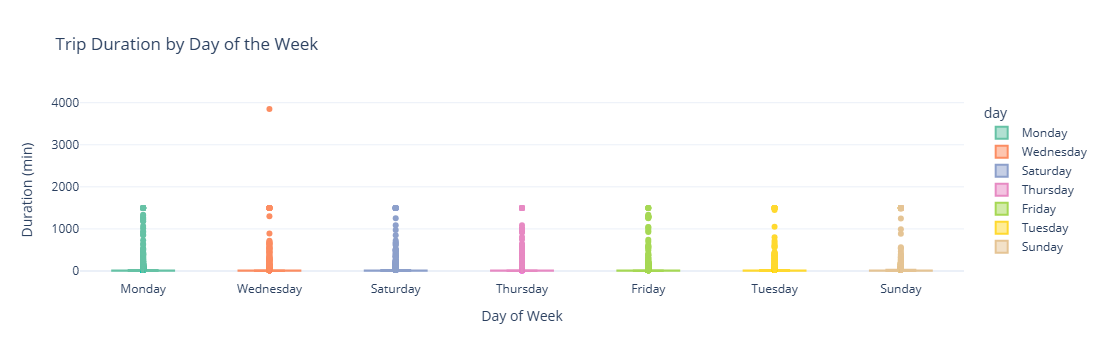

In [27]:
# Chart 4: Box plot - Duration per Day
fig4 = px.box(
    df, x='day', y='duration_min',
    title='Trip Duration by Day of the Week',
    color='day',
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig4.update_layout(xaxis_title='Day of Week', yaxis_title='Duration (min)')
fig4.show()


In [30]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'duration_min', 'hour', 'day', 'month', 'weekday',
       'date'],
      dtype='object')

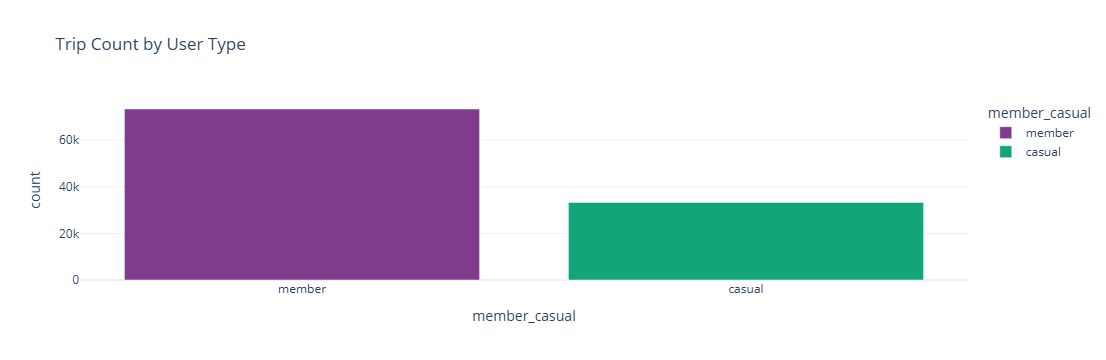

In [31]:
# Chart 5: Bar chart - Member type 
if 'member_casual' in df.columns:
    count_df = df['member_casual'].value_counts().reset_index()
    count_df.columns = ['member_casual', 'count']

    fig5 = px.bar(
        count_df,
        x='member_casual',
        y='count',
        title='Trip Count by User Type',
        color='member_casual',
        color_discrete_sequence=px.colors.qualitative.Bold
    )
    fig5.show()
else:
    print("Column 'member_casual' not found in dataset.")


C:\Users\Ali\AppData\Local\Temp\ipykernel_22372\526412300.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



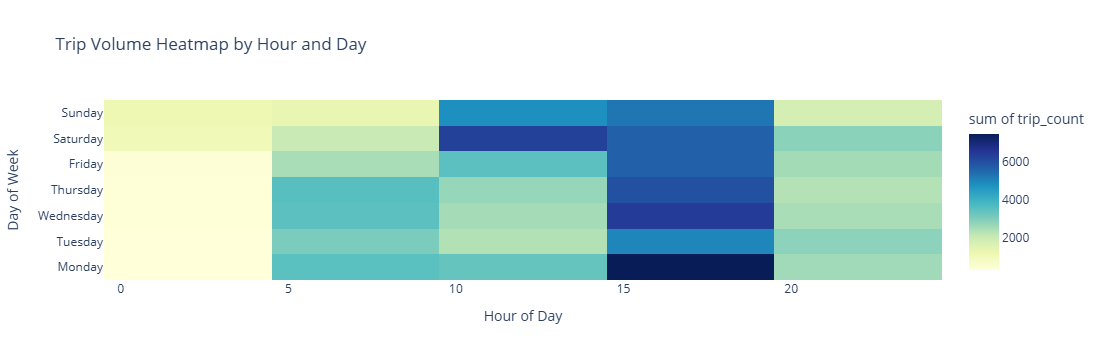

In [32]:
# Chart 6: Heatmap - Trips by Hour and Day
heatmap_df = df.groupby(['day', 'hour']).size().reset_index(name='trip_count')
fig6 = px.density_heatmap(
    heatmap_df,
    x='hour', y='day', z='trip_count',
    title='Trip Volume Heatmap by Hour and Day',
    color_continuous_scale='YlGnBu'
)
fig6.update_layout(xaxis_title='Hour of Day', yaxis_title='Day of Week')
fig6.show()


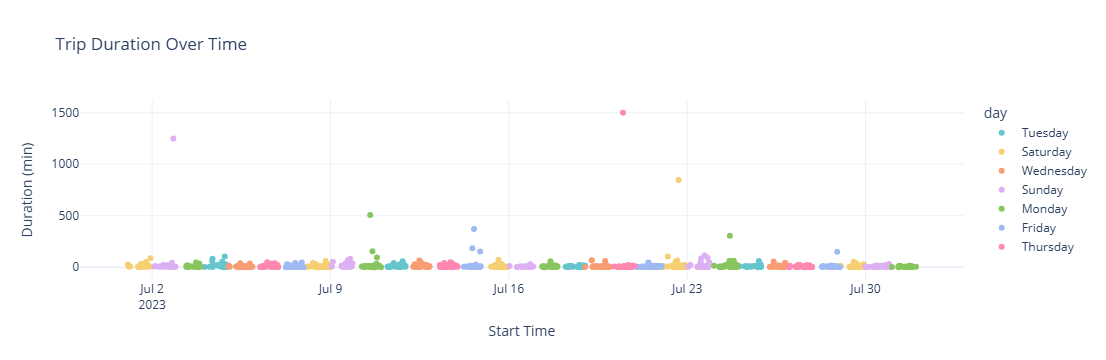

In [33]:
# Chart 7: Scatter plot - Start time vs Duration
fig7 = px.scatter(
    df.sample(1000),  # sample to reduce rendering load
    x='started_at', y='duration_min',
    title='Trip Duration Over Time',
    color='day',
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig7.update_layout(xaxis_title='Start Time', yaxis_title='Duration (min)')
fig7.show()
